# Q1. 

In [36]:
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", delimiter='|')
print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [37]:
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [38]:
df = users['gender'].eq('M').groupby(users['occupation']).mean().reset_index(name='ratio')
df=df.sort_values('ratio',ascending=[False])
print(df)

       occupation     ratio
2          doctor  1.000000
4        engineer  0.970149
19     technician  0.962963
15        retired  0.928571
14     programmer  0.909091
6       executive  0.906250
17      scientist  0.903226
5   entertainment  0.888889
9          lawyer  0.833333
16       salesman  0.750000
3        educator  0.726316
18        student  0.693878
13          other  0.657143
11      marketing  0.615385
20         writer  0.577778
12           none  0.555556
0   administrator  0.544304
1          artist  0.535714
10      librarian  0.431373
7      healthcare  0.312500
8       homemaker  0.142857


In [39]:
users.groupby('occupation').agg(

    {

        "age": ["min", "max"]

    }

)

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [40]:
# For each combination of occupation and sex, calculate the mean age
users.groupby(['gender','occupation'])['age'].mean()

gender  occupation   
F       administrator    40.638889
        artist           30.307692
        educator         39.115385
        engineer         29.500000
        entertainment    31.000000
        executive        44.000000
        healthcare       39.818182
        homemaker        34.166667
        lawyer           39.500000
        librarian        40.000000
        marketing        37.200000
        none             36.500000
        other            35.472222
        programmer       32.166667
        retired          70.000000
        salesman         27.000000
        scientist        28.333333
        student          20.750000
        technician       38.000000
        writer           37.631579
M       administrator    37.162791
        artist           32.333333
        doctor           43.571429
        educator         43.101449
        engineer         36.600000
        entertainment    29.000000
        executive        38.172414
        healthcare       45.40000

In [41]:
#For each occupation present the percentage of women and men
df1 = pd.crosstab(users['occupation'], users['gender'], normalize=0).round(4)*100
print(df1 )

gender             F       M
occupation                  
administrator  45.57   54.43
artist         46.43   53.57
doctor          0.00  100.00
educator       27.37   72.63
engineer        2.99   97.01
entertainment  11.11   88.89
executive       9.38   90.62
healthcare     68.75   31.25
homemaker      85.71   14.29
lawyer         16.67   83.33
librarian      56.86   43.14
marketing      38.46   61.54
none           44.44   55.56
other          34.29   65.71
programmer      9.09   90.91
retired         7.14   92.86
salesman       25.00   75.00
scientist       9.68   90.32
student        30.61   69.39
technician      3.70   96.30
writer         42.22   57.78


# Q2

In [42]:
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv", delimiter=',')
print(euro12)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [43]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [44]:
euro12.shape[0]

16

In [45]:
euro12.shape[1]

35

In [46]:
discipline = euro12[['Team','Yellow Cards', 'Red Cards']]

In [47]:
euro12.sort_values(['Red Cards','Yellow Cards'])

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
15,Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,...,13,76.5%,48,31,4,5,0,9,9,18
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,...,10,77.0%,34,43,4,6,0,7,7,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
14,Sweden,5,17,19,47.2%,13.8%,39,3,0,0,...,8,61.6%,35,51,7,7,0,9,9,18
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16


In [48]:
euro12.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [49]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [50]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [51]:
euro12.iloc[: , :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [52]:
# Select all columns except the last 3
euro12.iloc[: , :euro12.shape[1]-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [53]:
# Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12.Team.eq('England','Italy', 'Russia'),'Shooting Accuracy']

3    50.0%
Name: Shooting Accuracy, dtype: object

# Q3

In [55]:
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd

r1 = list(np.random.randint(low = 1,high=4,size=100))

r2 = list(np.random.randint(low = 1,high=3,size=100))

r3 = list(np.random.randint(low = 10000,high=30000,size=100))

data = list(zip(r1,r2,r3))

df=pd.DataFrame(data,columns=['bedrs', 'bathrs', 'price_sqr_meter'])
print(df)

s1= pd.DataFrame(r1)
s2= pd.DataFrame(r2)
s3= pd.DataFrame(r3)

s=s1.append(s2)
bigcolumn=s.append(s3)

print(bigcolumn)

rindex = list(range(0, 300, 1))
bigcolumn.reset_index(drop=True, inplace=True)  # Correctly resetting the index

bigcolumn = bigcolumn.reindex(rindex)  # Reindexing using the reindex method

print(bigcolumn)

    bedrs  bathrs  price_sqr_meter
0       2       1            25413
1       3       2            23395
2       1       2            26837
3       1       1            16562
4       1       2            29793
..    ...     ...              ...
95      1       1            11926
96      1       2            25774
97      3       1            25372
98      1       2            17761
99      3       2            26499

[100 rows x 3 columns]
        0
0       2
1       3
2       1
3       1
4       1
..    ...
95  11926
96  25774
97  25372
98  17761
99  26499

[300 rows x 1 columns]
         0
0        2
1        3
2        1
3        1
4        1
..     ...
295  11926
296  25774
297  25372
298  17761
299  26499

[300 rows x 1 columns]


C:\Users\Asus\AppData\Local\Temp\ipykernel_9592\2745819930.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s=s1.append(s2)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9592\2745819930.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bigcolumn=s.append(s3)


# Q4

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
data = pd.read_csv("file:///D:/BDAT%20Sem1/Data%20Programming/wind.txt", sep= '')
print(data)

data = data.rename(columns={'Yr': 'year', 'Mo': 'month','Dy': 'day'})

# Q5

In [56]:
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
chi = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
print(chi)

chi[:10]


      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [57]:
chi.shape[0]

4622

In [58]:
chi.shape[1]

5

In [59]:
chi.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [60]:

chi.agg(

    {

        "item_name": ["max"]

    }

)

,item_name
max,Veggie Soft Tacos


In [61]:
chi.loc[chi['item_name'] == 'Veggie Soft Tacos'].quantity.sum()

8

In [62]:
#11
'''
chi.agg(

    {

       # 'choice_description': ["max"]

    }

)
'''

'\nchi.agg(\n\n    {\n\n       # \'choice_description\': ["max"]\n\n    }\n\n)\n'

In [63]:
chi['quantity'].sum()

4972

In [64]:
chi['item_price'] = chi.item_price.str.replace('$', '').astype(float)
print(chi.dtypes)

chi['item_price'] = chi['item_price'].apply(lambda row: float(row))


print(chi.dtypes)

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object


C:\Users\Asus\AppData\Local\Temp\ipykernel_9592\4130431304.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chi['item_price'] = chi.item_price.str.replace('$', '').astype(float)


In [65]:
chi['item_price'].sum()

34500.16

In [66]:
chi['order_id'].count()

4622

In [67]:
chi['item_price'].sum() / chi['order_id'].count()

7.464335785374297

In [68]:
len(chi['item_name'].unique())

50

# Q6

In [69]:
from matplotlib import pyplot as plt
import numpy as np


import pandas as pd
users = pd.read_csv("C:/Users/Asus/Downloads/us-marriages-divorces-1867-2014.csv")
print(users)

     Year  Marriages  Divorces  Population  Marriages_per_1000  \
0    1867   357000.0   10000.0    36970000                 9.7   
1    1868   345000.0   10000.0    37885000                 9.1   
2    1869   348000.0   11000.0    38870000                 9.0   
3    1870   352000.0   11000.0    39905000                 8.8   
4    1871   359000.0   12000.0    41010000                 8.8   
..    ...        ...       ...         ...                 ...   
140  2007  2197000.0  856000.0   301696000                 7.3   
141  2008  2157000.0  844000.0   304543000                 7.1   
142  2009  2080000.0  840000.0   307240000                 6.8   
143  2010  2096000.0  872000.0   309776000                 6.8   
144  2011  2118000.0  877000.0   312034000                 6.8   

     Divorces_per_1000  
0                  0.3  
1                  0.3  
2                  0.3  
3                  0.3  
4                  0.3  
..                 ...  
140                2.8  
141    

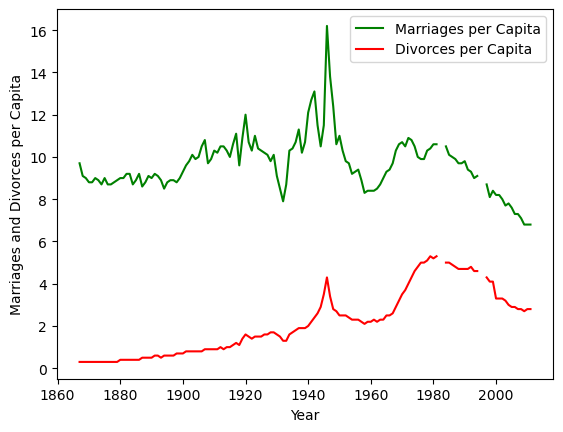

In [70]:
plt.plot(users['Year'], users['Marriages_per_1000'], color='g',label='Marriages per Capita')        # specify color by name
plt.plot(users['Year'], users['Divorces_per_1000'], color='r',label='Divorces per Capita')
plt.xlabel("Year")
plt.ylabel("Marriages and Divorces per Capita");
plt.legend();

# Q7

In [71]:
from matplotlib import pyplot as plt
import numpy as np


import pandas as pd
users = pd.read_csv("C:/Users/Asus/Downloads/us-marriages-divorces-1867-2014.csv")
print(users)

     Year  Marriages  Divorces  Population  Marriages_per_1000  \
0    1867   357000.0   10000.0    36970000                 9.7   
1    1868   345000.0   10000.0    37885000                 9.1   
2    1869   348000.0   11000.0    38870000                 9.0   
3    1870   352000.0   11000.0    39905000                 8.8   
4    1871   359000.0   12000.0    41010000                 8.8   
..    ...        ...       ...         ...                 ...   
140  2007  2197000.0  856000.0   301696000                 7.3   
141  2008  2157000.0  844000.0   304543000                 7.1   
142  2009  2080000.0  840000.0   307240000                 6.8   
143  2010  2096000.0  872000.0   309776000                 6.8   
144  2011  2118000.0  877000.0   312034000                 6.8   

     Divorces_per_1000  
0                  0.3  
1                  0.3  
2                  0.3  
3                  0.3  
4                  0.3  
..                 ...  
140                2.8  
141    

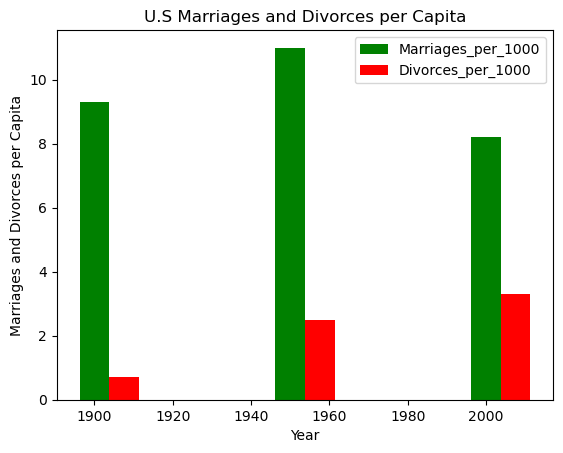

In [72]:
# data to plot
v1=users.loc[users['Year'] == 1900, 'Marriages_per_1000'].iloc[0]
v2= users.loc[users['Year'] == 1950, 'Marriages_per_1000'].iloc[0]
v3=users.loc[users['Year'] == 2000, 'Marriages_per_1000'].iloc[0]


v4=users.loc[users['Year'] == 1900, 'Divorces_per_1000'].iloc[0]
v5= users.loc[users['Year'] == 1950, 'Divorces_per_1000'].iloc[0]
v6=users.loc[users['Year'] == 2000, 'Divorces_per_1000'].iloc[0]

marriages = [v1,v2,v3]
divorces = [v4,v5,v6]

# create plot
fig, ax = plt.subplots()
bar_width = 7.55
X = np.arange(start=1900, stop=2050, step=50)

p1 = plt.bar(X, marriages, bar_width, color='g',
label='Marriages_per_1000')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + bar_width, divorces, bar_width,
color='r',
label='Divorces_per_1000')

plt.xlabel('Year')
plt.ylabel('Marriages and Divorces per Capita')
plt.title('U.S Marriages and Divorces per Capita')

plt.legend()

# Q8

In [73]:
from matplotlib import pyplot as plt
import numpy as np


import pandas as pd
users = pd.read_csv("C:/Users/Asus/Downloads/actor_kill_counts.csv")
print(users)

                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239
5                 Jet Li    201
6           Nicolas Cage    204
7     Sylvester Stallone    267
8    Tomisaburo Wakayama    226
9          Wesley Snipes    193


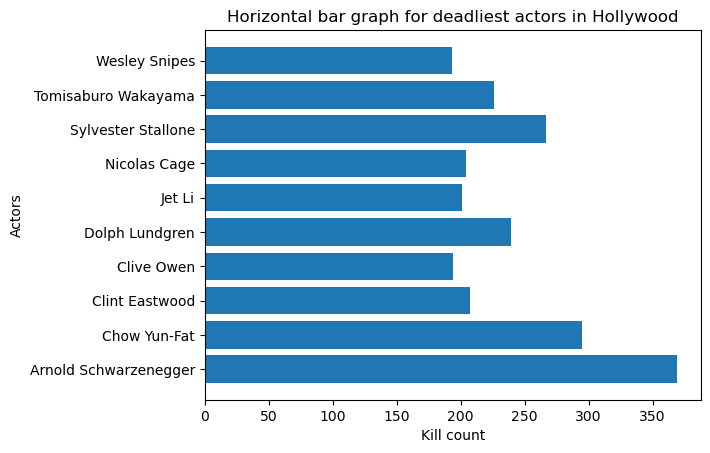

In [74]:
y=users['Actor']

x=users['Count']
plt.barh(y, x)

plt.ylabel("Actors")

plt.xlabel("Kill count")
plt.title("Horizontal bar graph for deadliest actors in Hollywood")
plt.show()

# Q9

In [75]:
from matplotlib import pyplot as plt
import numpy as np


import pandas as pd
users = pd.read_csv("C:/Users/Asus/Downloads/roman-emperor-reigns.csv")
print(users)

           Emperor  Length_of_Reign         Cause_of_Death
0         Augustus            40.58  Possibly assassinated
1         Tiberius            22.50  Possibly assassinated
2         Caligula             4.83           Assassinated
3         Claudius            13.75  Possibly assassinated
4             Nero            13.67                Suicide
..             ...              ...                    ...
63   Valentinian I            11.00         Natural causes
64          Valens            14.00       Killed in battle
65         Gratian            16.00           Assassinated
66  Valentinian II            17.00  Possibly assassinated
67    Theodosius I            16.00         Natural causes

[68 rows x 3 columns]


In [ ]:
df=users.loc[users['Cause_of_Death']== 'Assassinated']

In [76]:
print(df)

    bedrs  bathrs  price_sqr_meter
0       2       1            25413
1       3       2            23395
2       1       2            26837
3       1       1            16562
4       1       2            29793
..    ...     ...              ...
95      1       1            11926
96      1       2            25774
97      3       1            25372
98      1       2            17761
99      3       2            26499

[100 rows x 3 columns]


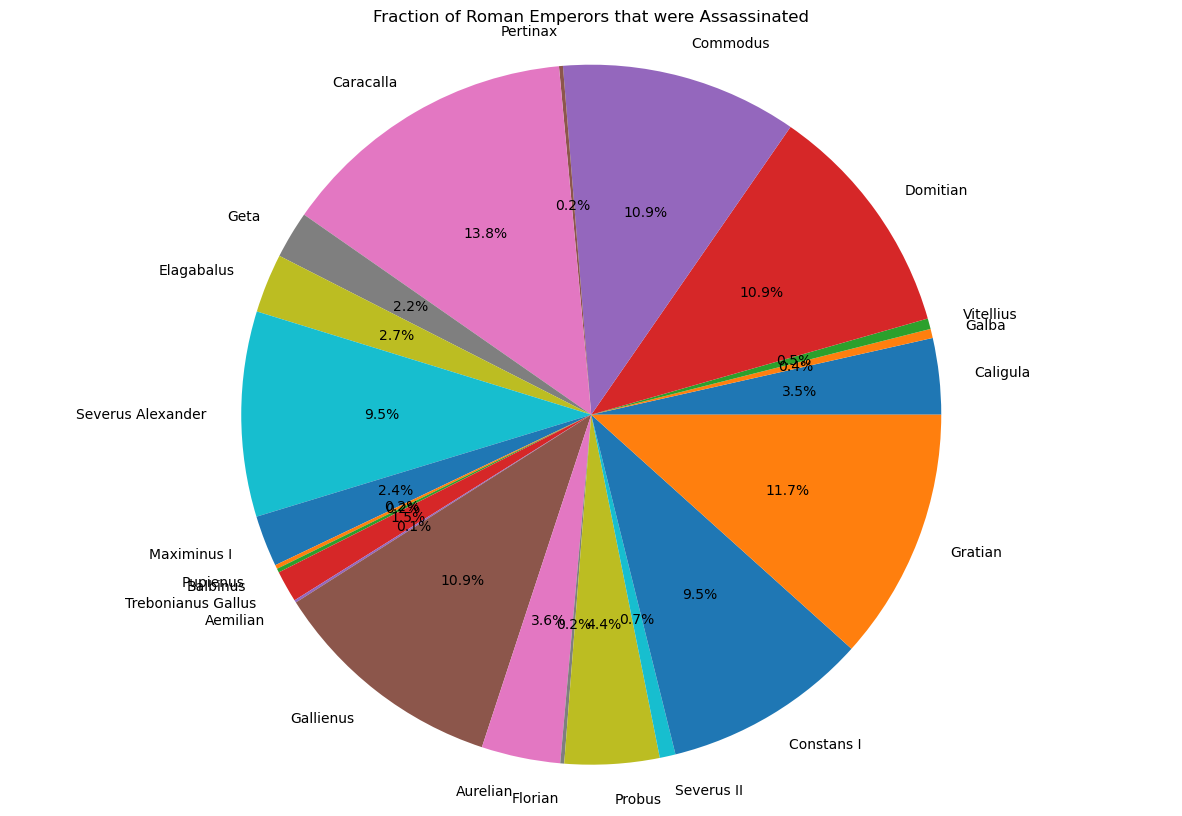

In [77]:
# Creating dataset
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
users = pd.read_csv("C:/Users/Asus/Downloads/roman-emperor-reigns.csv")
df = users.loc[users['Cause_of_Death']=='Assassinated']
label= df['Emperor']
data = df['Length_of_Reign']

# Creating plot
fig = plt.figure(figsize =(15, 10))
plt.pie(data, labels = label,autopct='%1.1f%%')

# show plot
plt.axis('equal')
plt.title("Fraction of Roman Emperors that were Assassinated")
plt.show()

# Q10

In [78]:
from matplotlib import pyplot as plt
import numpy as np


import pandas as pd
users = pd.read_csv("C:/Users/Asus/Downloads/arcade-revenue-vs-cs-doctorates.csv")
print(users)

   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   
5  2005                            1.435   
6  2006                            1.601   
7  2007                            1.654   
8  2008                            1.803   
9  2009                            1.734   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  
5                                      1129  
6                                      1453  
7                                      1656  
8                                      1787  
9                                      1611  


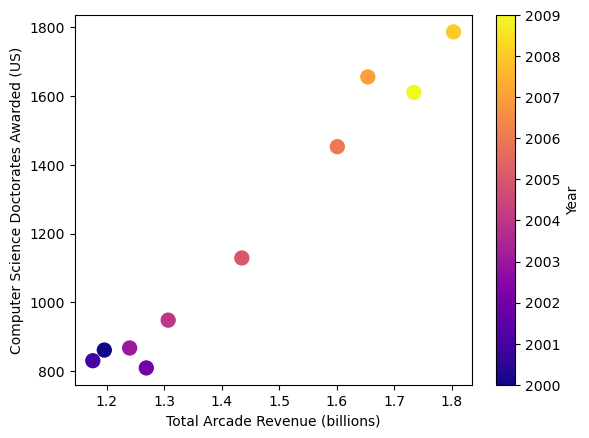

In [79]:
users.plot.scatter(x = 'Total Arcade Revenue (billions)', y = 'Computer Science Doctorates Awarded (US)',s=100,c='Year',colormap='plasma');